In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')


from SALib.sample import saltelli
from SALib.analyze import sobol

import scipy 
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('/Users/casper/Documents/TU Della/Thesis/Finals Docs/Experiments/tables/Final model experiment 3 table-table.csv', skiprows=6 ) 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000100 entries, 0 to 10000099
Data columns (total 49 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   [run number]                                    int64  
 1   walking-radius                                  int64  
 2   prob-of-violating-rules                         int64  
 3   new-car-treshold                                float64
 4   number-of-cars-company0                         int64  
 5   graduated-sanctions                             bool   
 6   car-sharing-demand                              int64  
 7   number-of-companies                             int64  
 8   collective-choice-arrangement                   bool   
 9   One-company                                     bool   
 10  number-of-cars-company1                         int64  
 11  sanctioning-multiple                            int64  
 12  speed                     

In [4]:
df.rename(columns={'[run number]':'run number','[step]':'tick', '[ satisfied-users ] of company 0':'satisfied company 0',  '[ satisfied-users ] of company 1':'satisfied company 1', '[ satisfied-users ] of company 2': 'satisfied company 2', '[ unsatisfied-users ] of company 0':'unsatisfied company 0',  '[ unsatisfied-users ] of company 1':'unsatisfied company 1', '[ unsatisfied-users ] of company 2': 'unsatisfied company 2', 'count cars with [ ( company-id = company 0 ) ]': 'cars company 0', 'count cars with [ ( company-id = company 1 ) ]': 'cars company 1', 'count cars with [ ( company-id = company 2 ) ]': 'cars company 2'  }, inplace= True) 
df ['total satisfied users'] = df['satisfied company 0'] + df['satisfied company 1'] + df['satisfied company 2'] 
df ['total unsatisfied users'] = df['unsatisfied company 0'] + df['unsatisfied company 1'] + df['unsatisfied company 2'] 
df ['total no parking found'] = df['[ no-parking ] of company 0'] + df['[ no-parking ] of company 1'] + df['[ no-parking ] of company 2']
df ['total profit'] = df[ '[ profit ] of company 0'] + df[ '[ profit ] of company 1'] + df[ '[ profit ] of company 2'] 
df.rename(columns={ '[ no-parking ] of company 0': 'no parking company 0', '[ no-parking ] of company 1': 'no parking company 1', '[ no-parking ] of company 2': 'no parking company 2', '[ company-price ] of company 0': 'price company 0', '[ company-price ] of company 1': 'price company 1', '[ company-price ] of company 2': 'price company 2', '[ profit ] of company 0': 'profit company 0', '[ profit ] of company 1': 'profit company 1', '[ profit ] of company 2': 'profit company 2'}, inplace= True)

In [5]:
df1 = df.drop(columns=['walking-radius', 'prob-of-violating-rules', 'new-car-treshold', 'number-of-cars-company0', 'number-of-cars-company1', 'number-of-cars-company2', 'number-of-companies', 'One-company', 'speed', '[ vote ] of company 0', '[ vote ] of company 1', '[ vote ] of company 2', 'prob-of-sanctioning', '[ company-rules-violated ] of company 0', '[ company-rules-violated ] of company 1', '[ company-rules-violated ] of company 2', '[ company-sanctioned ] of company 0', '[ company-sanctioned ] of company 1', '[ company-sanctioned ] of company 2', 'car-sharing-demand'])

In [6]:
list(df1.columns)

['run number',
 'graduated-sanctions',
 'collective-choice-arrangement',
 'sanctioning-multiple',
 'starting-bottom-price',
 'tick',
 'satisfied company 0',
 'unsatisfied company 0',
 'satisfied company 1',
 'unsatisfied company 1',
 'satisfied company 2',
 'unsatisfied company 2',
 'price company 0',
 'price company 1',
 'price company 2',
 'profit company 0',
 'profit company 1',
 'profit company 2',
 'cars company 0',
 'cars company 1',
 'cars company 2',
 'count users',
 'market-price',
 'bottom-price',
 'count cars with [ available = true ]',
 'count patches with [ empty = true ]',
 'no parking company 0',
 'no parking company 1',
 'no parking company 2',
 'total satisfied users',
 'total unsatisfied users',
 'total no parking found',
 'total profit']

In [7]:
df4 = df1.drop(columns=['run number', 'tick', 'satisfied company 0', 'satisfied company 1', 'satisfied company 2', 'unsatisfied company 0', 'unsatisfied company 1', 'unsatisfied company 2', 'price company 0', 'price company 1', 'price company 2', 'profit company 0', 'profit company 1', 'profit company 2', 'cars company 0', 'cars company 1', 'cars company 2'])

In [8]:
spearman1 = df4.corr(method='spearman')
spearman1

,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,count users,market-price,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
graduated-sanctions,1.000000,NaN,NaN,NaN,-0.006360,-0.374357,0.051005,-0.705062,0.685174,0.000391,-0.000728,0.000034,-0.000105,0.000342,-0.000137,-0.143635
collective-choice-arrangement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sanctioning-multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
starting-bottom-price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count users,-0.006360,NaN,NaN,NaN,1.000000,0.013175,0.068096,-0.499371,0.512502,0.049553,0.049385,0.049363,0.049422,0.049140,0.049422,0.052769
market-price,-0.374357,NaN,NaN,NaN,0.013175,1.000000,0.626805,0.141950,-0.129716,0.609538,0.608523,0.609375,0.609315,0.609337,0.609333,0.737747
bottom-price,0.051005,NaN,NaN,NaN,0.068096,0.626805,1.000000,-0.383994,0.394620,0.962100,0.961894,0.961964,0.962250,0.962389,0.962248,0.954250
count cars with [ available = true ],-0.705062,NaN,NaN,NaN,-0.499371,0.141950,-0.383994,1.000000,-0.999137,-0.346435,-0.345511,-0.345792,-0.345987,-0.346253,-0.345954,-0.198516
count patches with [ empty = true ],0.685174,NaN,NaN,NaN,0.512502,-0.129716,0.394620,-0.999137,1.000000,0.357377,0.356485,0.356730,0.356940,0.357193,0.356907,0.211234
no parking company 0,0.000391,NaN,NaN,NaN,0.049553,0.609538,0.962100,-0.346435,0.357377,1.000000,0.999086,0.999098,0.999696,0.999666,0.999696,0.964048


In [ ]:
df1.head(5)

In [ ]:
df1.plot.scatter(x='tick',y='market-price',figsize=(15,8))

In [ ]:
df1.plot.scatter(x='tick',y='total-profit',figsize=(15,8))

In [ ]:
df1.plot.scatter(x='tick',y='market-price',c='run number',colormap='plasma',figsize=(20,10))

In [ ]:
df1.plot.scatter(x='tick',y='bottom-price',c='run number',colormap='plasma',figsize=(20,10))

In [ ]:
df1.plot.scatter(x='tick',y='count patches with [ empty = true ]',c='run number',colormap='plasma',figsize=(20,10))

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total satisfied users'], by=['graduated-sanctions'])
 
plt.show()

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total unsatisfied users'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total no parking found'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total profit'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 0'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 1'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 2'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 0'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 1'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 2'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 0'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 1'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 2'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 0'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 1'], by=['graduated-sanctions'])

In [ ]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 2'], by=['graduated-sanctions'])

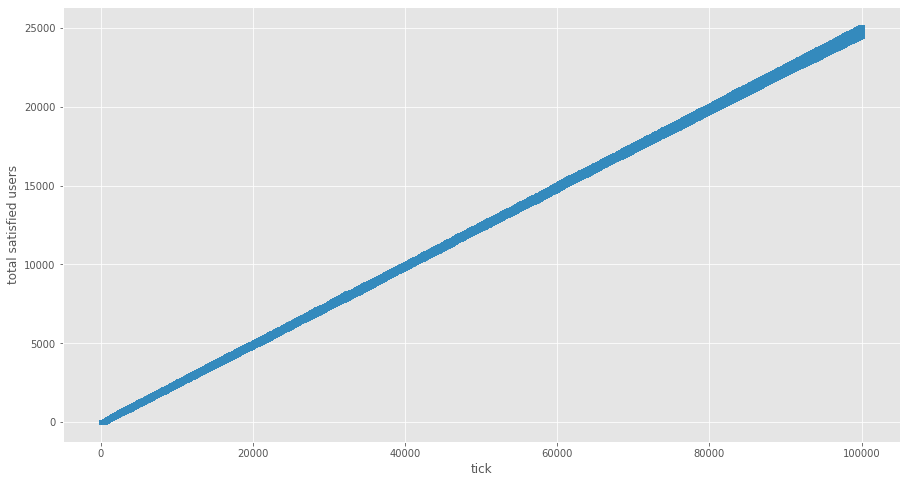

In [8]:
df2 = df1.loc[df1['graduated-sanctions'] == True ]
df2.head(5)
df2.plot.scatter(x='tick',y='total satisfied users',figsize=(15,8))

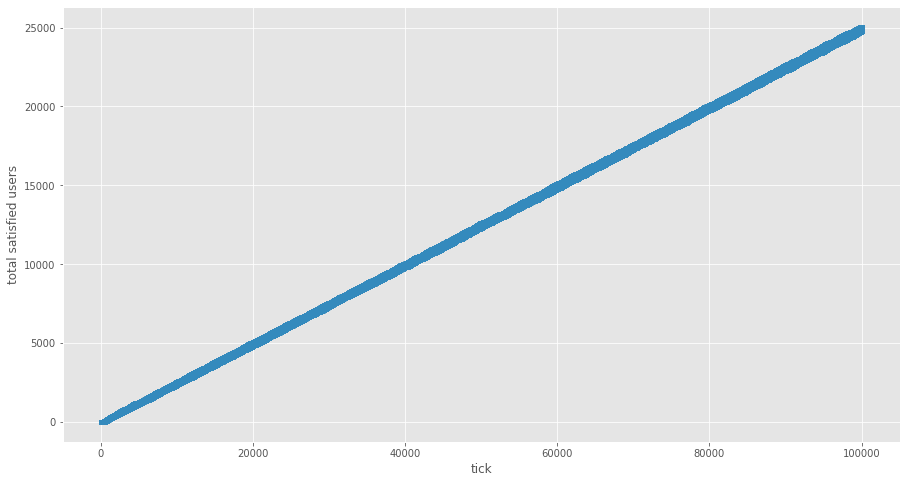

In [9]:
df3 = df1.loc[df1['graduated-sanctions'] == False ]
df3.head(5)
df3.plot.scatter(x='tick',y='total satisfied users',figsize=(15,8))

Text(0, 0.5, 'Combined company profits')

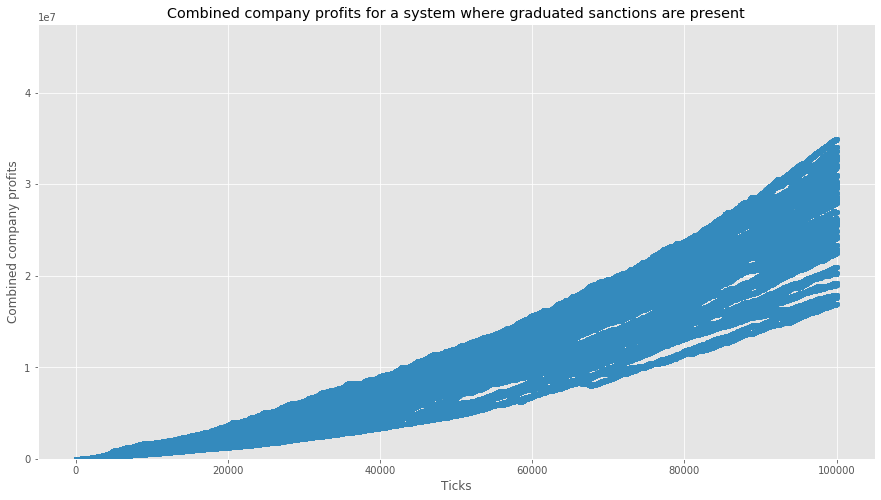

In [15]:
plot = df2.plot.scatter(x='tick',y='total profit',figsize=(15,8))
plt.ylim(0, 47500000 )
plot.get_figure().gca().set_title("Combined company profits for a system where graduated sanctions are present")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Ticks")
plot.get_figure().gca().set_ylabel("Combined company profits")

In [ ]:
df3.agg([np.mean, np.std])

Text(0, 0.5, 'Combined company profits')

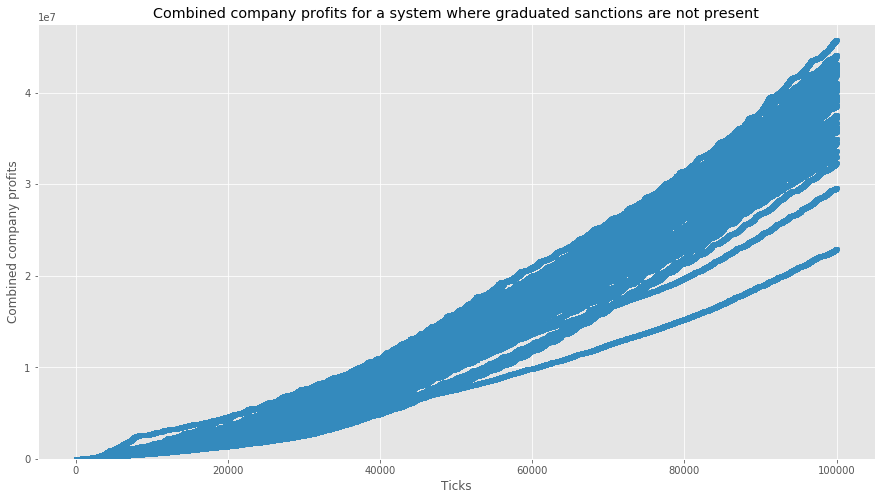

In [16]:
plot = df3.plot.scatter(x='tick',y='total profit',figsize=(15,8))
plt.ylim(0, 47500000 )
plot.get_figure().gca().set_title("Combined company profits for a system where graduated sanctions are not present")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Ticks")
plot.get_figure().gca().set_ylabel("Combined company profits")

In [ ]:
plt.errorbar(x = 'ticks', y = 'market-price')

In [ ]:
df3_mean = df3['market-price'].mean()
print(df3_mean)
df3_std = df3['market-price'].std()
print(df3_std)
df3['market-price'].max()

In [ ]:
df2['market-price'].max()

In [11]:
df3_mean2 = df3['total satisfied users'].mean()
print(df3_mean2)
df3_std2 = df3['total satisfied users'].std()
print(df3_std2)

12424.598688813112
7210.217017435856


In [ ]:
df3_mean1 = df3['bottom-price'].mean()
print(df3_mean1)
df3_std1 = df3['bottom-price'].std()
print(df3_std1)

In [13]:
df2_mean = df2['total satisfied users'].mean()
print(df2_mean)
df2_std = df2['total satisfied users'].std()
print(df2_std)

12423.096445835541
7209.957728957202


In [ ]:
df2_mean1 = df2['bottom-price'].mean()
print(df2_mean1)
df2_std1 = df2['bottom-price'].std()
print(df2_std1)

In [ ]:
df2_mean2 = df2['count patches with [ empty = true ]'].mean()
print(df2_mean2)
df2_std2 = df2['count patches with [ empty = true ]'].std()
print(df2_std2)

In [ ]:
pearsoncorr = df1.corr(method='spearman')
pearsoncorr